# DAY 1 
## COST FUNCTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dataset

m = 10 # Numnbers of Example
n = 2 # Numbers Of Features
X = np.random.random((m,1))
Y = np.array(range(m)).reshape(-1,1)
theta = np.random.random((n,1))

$ Y = {\theta}_0 * X_0 + {\theta}_1 * X_1   $

$ X_0 = 1 $

In [3]:
# Adding base X(0) Value in X  

Xnew = np.insert(X,0,1,axis=1)

$ h_{\theta} = X * {\theta} $

In [4]:
# Initial Prediction Of Y (with out Training)

h = Xnew.dot(theta)

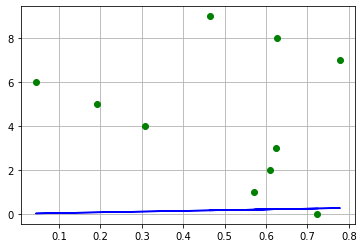

In [5]:
# Plot Data into 2D scatter Plot (initial Observation)

plt.figure(1)
plt.plot(X,Y,'go')
plt.plot(X,h,'b')
plt.grid(True)

# Cost Function For Regression Model

$ Cost=  1 / (2*m) \sum \limits _{i=1} ^{m} {(h_{\theta}(x ^i) - y ^i)}^2 $

In [6]:
# Step By Step Solution

$ error = h_{\theta} - Y $ 

$ sqrError = {error} ^2  $

$ sumOfError = \sum \limits_{i=1} ^{m} {sqrError}^i $

$ Cost = 1/(2*m) * sumOfError $

In [7]:
def Cost_function(X,Y,h):
    error = h - Y
    sqr_error = np.square(error)
    sum_Of_error = np.sum(sqr_error)
    return 1/(2*m) * sum_Of_error

In [8]:
# Value Of Cost Function Define Accuraccy of Hypothesis' Fucntion
# More Closer to 0, More Better and accurate Value of Theta wee havee
# Our main Goal is minimize this Cost Function By using Gradient Descenet Algorithm 

Cost_function(X,Y,h)

13.54726262668159